In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

<h3>Leitura dos dados</h3>

In [3]:
colunas_stats = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

<h3>Definição das funções</h3>

In [4]:
def get_melhores_colunas(df_rank):
    label_grupo_bom = df_rank[df_rank[1]==df_rank[1].max()].labels.values[0]
    melhores_colunas = df_rank[df_rank['labels']==label_grupo_bom][0]
    cols = melhores_colunas.values.tolist()
    return cols
def get_rank(arquivo):
    df_conhecimento = pd.read_csv(arquivo)
    # Criando classificador RF
    rf_clas = RandomForestClassifier(n_jobs=8, n_estimators=100, max_features=5, random_state=0, max_depth=3, min_samples_split=5)
    rf_clas.fit(df_conhecimento[colunas_stats], df_conhecimento.verifica)
    
    # Criando rank colunas
    df_rank = pd.DataFrame(sorted(list(zip(colunas_stats,rf_clas.feature_importances_)), key=lambda x: x[1], reverse=True))
    
    # Divide colunas em 2 grupos
    dados = df_rank[[1]].values
    kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, n_jobs=8)
    kmeans = kmeans.fit(dados)
    labels = kmeans.predict(dados)
    df_rank['labels'] = labels
    
    return df_rank
def exibir(df_rank):
    melhores_colunas = get_melhores_colunas(df_rank)
    print('Melhores colunas', melhores_colunas)
    df_rank.plot.bar(x=0, y=1, figsize=(12,5))
    return df_rank

<h3>Visualização</h3>

Melhores colunas ['nbrl', 'medianb5']


,0,1,labels
0,nbrl,0.398085,1
1,medianb5,0.373233,1
2,ndvi,0.090504,0
3,medianb6,0.058376,0
4,medianb3,0.054078,0
5,medianb2,0.020033,0
6,medianb7,0.004368,0
7,dif_ndvi,0.001236,0
8,dif_dnbrl,0.000047,0
9,medianb4,0.000039,0


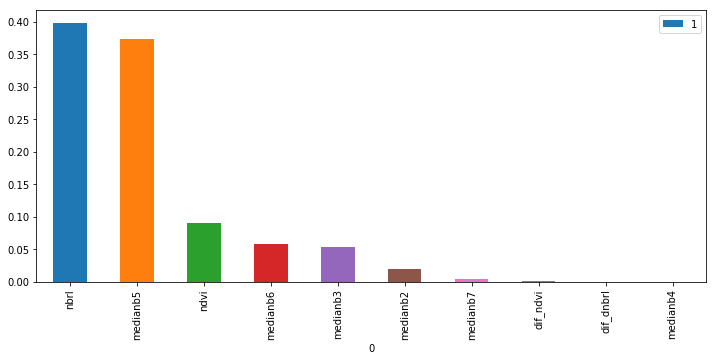

In [5]:
df_rank = get_rank('conhecimento.csv')
exibir(df_rank)

<h3>Conclusão</h3>
<pre>
- Mesmo resultado da interpretação visual feita no gráfico de densidade em 
  <b><i>analise_amostras.ipynb</i></b>
</pre>